In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Task 3/Linear regression on housing dataset/HousingData.csv")
print("Raw Shape:", df.shape)
print(df.head())

Raw Shape: (506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [3]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [4]:
# Clean data
df = df.drop_duplicates().dropna()
print("\nCleaned Shape:", df.shape)


Cleaned Shape: (394, 14)


In [5]:
# Features & Target
X = df.drop('MEDV', axis=1)   # house price column (Boston dataset)
y = df['MEDV']

In [6]:
# Encode categoricals (if any)
cat_cols = X.select_dtypes(include=['object', 'category']).columns
if len(cat_cols):
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [7]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [9]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"\nMSE: {mse:.4f}    R²: {r2:.4f}")


MSE: 31.4540    R²: 0.6271


In [11]:
# Results Table
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
results["Error"] = results["Actual"] - results["Predicted"]
print(results.head())

   Actual  Predicted     Error
0    25.0  29.228502 -4.228502
1    18.6  17.503747  1.096253
2    21.0  21.808038 -0.808038
3    23.5  30.494253 -6.994253
4    17.5  18.502655 -1.002655


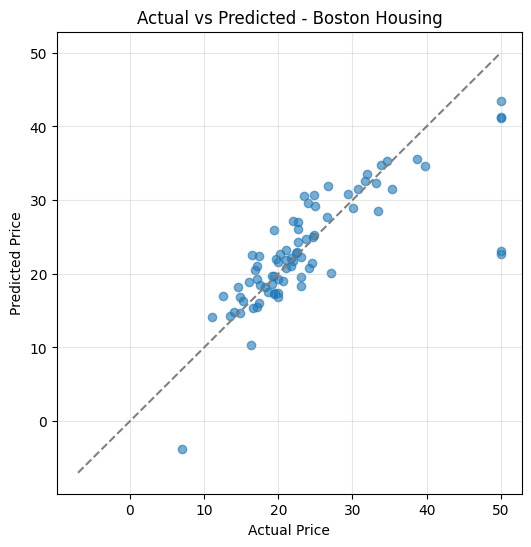

In [12]:
# Plot
plt.figure(figsize=(6,6))
plt.scatter(results["Actual"], results["Predicted"], alpha=0.6)
plt.plot([results.min().min(), results.max().max()],
         [results.min().min(), results.max().max()],
         "--", color="gray")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Boston Housing")
plt.grid(True, alpha=0.3)
plt.show()